# Linear Regression Model for Salary Prediction Based on Years of Experience

## Imports

In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

## Data Information

In [17]:
# Reading CSV data
salary = pd.read_csv('../input/salary.csv')

# Data information
print('Info:')
salary.info()
print("\n" + "∙"*40 + "\n")

# Data columns
print('Columns:')
print(salary.columns)
print("\n" + "∙"*40 + "\n")

# Data head
print('Head:')
print(salary.head())

Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35 entries, 0 to 34
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  35 non-null     float64
 1   Salary           35 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 692.0 bytes

∙∙∙∙∙∙∙∙∙∙∙∙∙∙∙∙∙∙∙∙∙∙∙∙∙∙∙∙∙∙∙∙∙∙∙∙∙∙∙∙

Columns:
Index(['YearsExperience', 'Salary'], dtype='object')

∙∙∙∙∙∙∙∙∙∙∙∙∙∙∙∙∙∙∙∙∙∙∙∙∙∙∙∙∙∙∙∙∙∙∙∙∙∙∙∙

Head:
   YearsExperience  Salary
0              1.1   39343
1              1.3   46205
2              1.5   37731
3              2.0   43525
4              2.2   39891


## Training the Model

In [21]:
# Target and Features
X = salary[['YearsExperience']]
y = salary['Salary']

# Train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((28, 1), (7, 1), (28,), (7,))

In [22]:
# Select model and train
model = LinearRegression()
model.fit(X_train, y_train)

# Predictions
y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)

## Model Performance

### Metrics for Train

In [28]:
# Metrics
mse_train = mean_squared_error(y_train, y_pred_train)
mae_train = mean_absolute_error(y_train, y_pred_train)
r2_train = r2_score(y_train, y_pred_train)

# Displaying train metrics
metrics = {
    "∙ MSE Train ∙": round(mse_train, 2),
    "∙ MAE Train ∙": round(mae_train, 2),
    "∙ R2 Train ∙": round(r2_train, 2),
}

train_metrics_df = pd.DataFrame(metrics, index=[0])
print(train_metrics_df)

   ∙ MSE Train ∙  ∙ MAE Train ∙  ∙ R2 Train ∙
0    30888963.78        4651.97          0.97


### Metrics for Test

In [29]:
# Metrics
mse_test = mean_squared_error(y_test, y_pred_test)
mae_test = mean_absolute_error(y_test, y_pred_test)
r2_test = r2_score(y_test, y_pred_test)

# Displaying train metrics
metrics = {
    "∙ MSE Test ∙": round(mse_test, 2),
    "∙ MAE Test ∙": round(mae_test, 2),
    "∙ R2 Test ∙": round(r2_test, 2),
}

train_metrics_df = pd.DataFrame(metrics, index=[0])
print(train_metrics_df)

   ∙ MSE Test ∙  ∙ MAE Test ∙  ∙ R2 Test ∙
0   55761791.31       6692.36         0.89


## Data Visualization

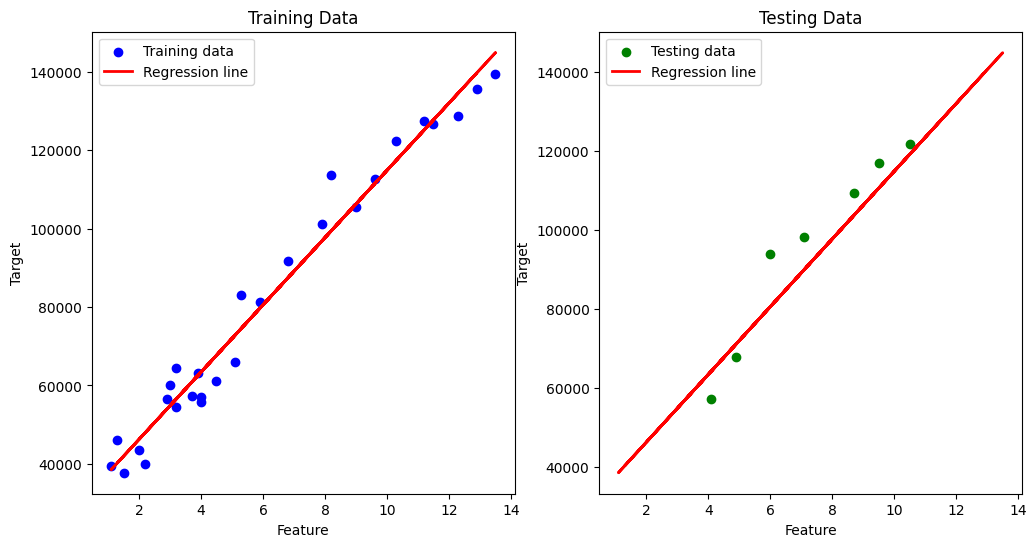

In [30]:
# Plotting the data and the regression line
plt.figure(figsize=(12, 6))

# Training data
plt.subplot(1, 2, 1)
plt.scatter(X_train, y_train, color='blue', label='Training data')
plt.plot(X_train, y_pred_train, color='red', linewidth=2, label='Regression line')
plt.title('Training Data')
plt.xlabel('Feature')
plt.ylabel('Target')
plt.legend()

# Testing data
plt.subplot(1, 2, 2)
plt.scatter(X_test, y_test, color='green', label='Testing data')
plt.plot(X_train, y_pred_train, color='red', linewidth=2, label='Regression line')
plt.title('Testing Data')
plt.xlabel('Feature')
plt.ylabel('Target')
plt.legend()

plt.show()